# Bank churn Analysis using XGB classifier


# About Author

👨🏽‍💻 Muhammad Ishaque

📊 Data Analyst
🌱 https://www.linkedin.com/in/muhammad-ishaque-/
🥅 https://github.com/eshaque5830
✳️ www.anchantech.com
📫 eshaquehussain@gmail.com

<img src="https://user-images.githubusercontent.com/58620359/174948746-5dc3418a-8296-4cc8-9561-f8f12ca9a0a4.png" alt="Alt text" width="750" height="300">



## 1- Data Exploration:
- train.csv - the training dataset; Exited is the binary target
- test.csv - the test dataset; your objective is to predict the probability of Exited
- sample_submission.csv - a sample submission file in the correct format


### 1.1-Data Description:

- Customer ID: A unique identifier for each customer

- Surname: The customer's surname or last name

- Credit Score: A numerical value representing the customer's credit score

- Geography: The country where the customer resides

- Gender: The customer's gender

- Age: The customer's age.

- Tenure: The number of years the customer has been with the bank

- Balance: The customer's account balance

- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)

- HasCrCard: Whether the customer has a credit card

- IsActiveMember: Whether the customer is an active member

- EstimatedSalary: The estimated salary of the customer

- Exited: Whether the customer has churned (Target Variable)

### 1.2-Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# remove warnings
import warnings
warnings.filterwarnings('ignore')

### 1.3-Loading the datasets

In [2]:
# load the datasets
df_train = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')

In [3]:
# explorating the train dataset 
df_train.head().T

,0,1,2,3,4
id,0,1,2,3,4
CustomerId,15674932,15749177,15694510,15741417,15766172
Surname,Okwudilichukwu,Okwudiliolisa,Hsueh,Kao,Chiemenam
CreditScore,668,627,678,581,716
Geography,France,France,France,France,Spain
Gender,Male,Male,Male,Male,Male
Age,33.0,33.0,40.0,34.0,33.0
Tenure,3,1,10,2,5
Balance,0.0,0.0,0.0,148882.54,0.0
NumOfProducts,2,2,2,1,2


In [4]:
df = df_train.copy() #assigning df_train to df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
# find and plot null values
df.isnull().sum().sort_values(ascending=False).head(5)

id             0
CustomerId     0
Surname        0
CreditScore    0
Geography      0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [8]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
#counts for each unique categoricalvalue in the specified columns
cat_cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited']

num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# find the value counts of the categorical columns
for col in cat_cols:
    print(df[col].value_counts())
    print()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

Gender
Male      93150
Female    71884
Name: count, dtype: int64

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

Exited
0    130113
1     34921
Name: count, dtype: int64



### 1.4- Plotting

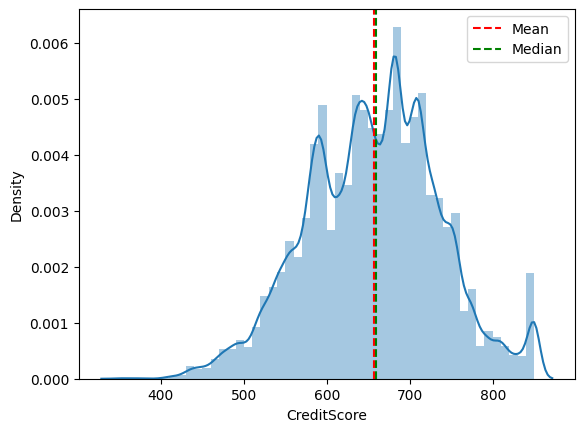

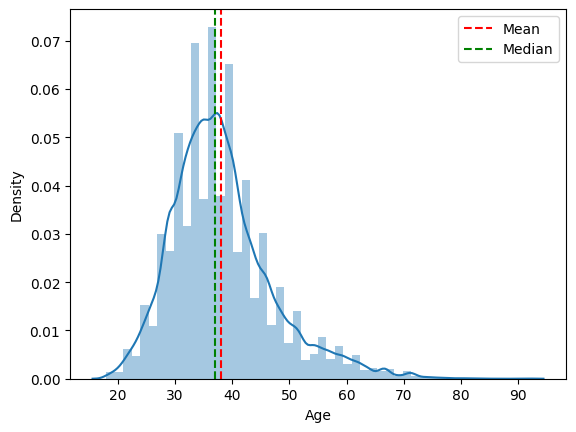

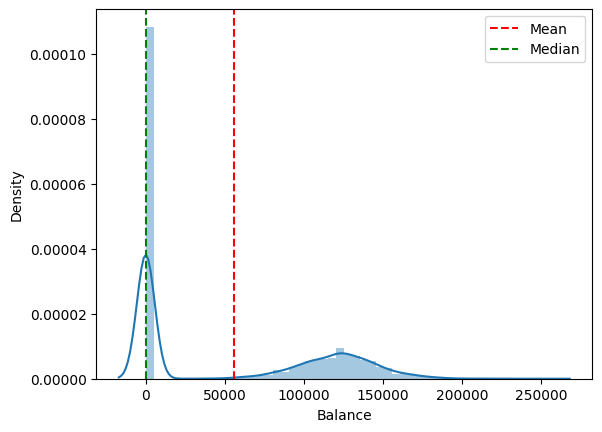

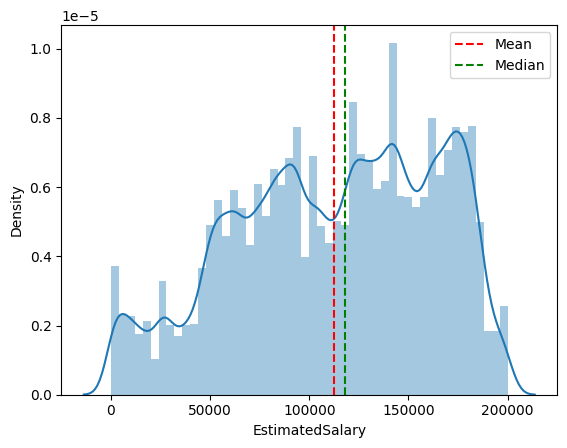

In [10]:

# create histogram of numerical columns using sns and kde=true
import matplotlib.pyplot as plt

for col in num_cols:
    sns.distplot(df[col], kde=True)
    plt.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='g', linestyle='--', label='Median')
    plt.legend()
    plt.show()

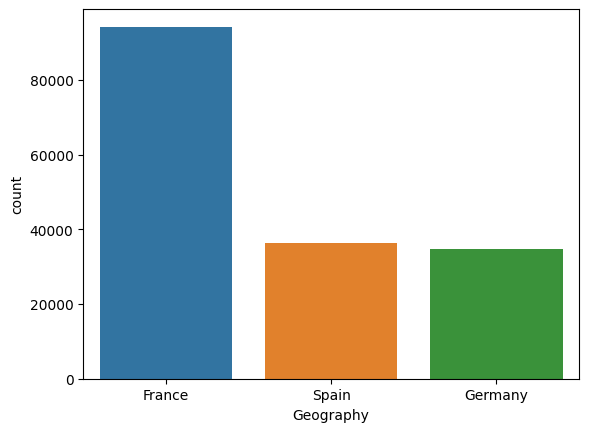

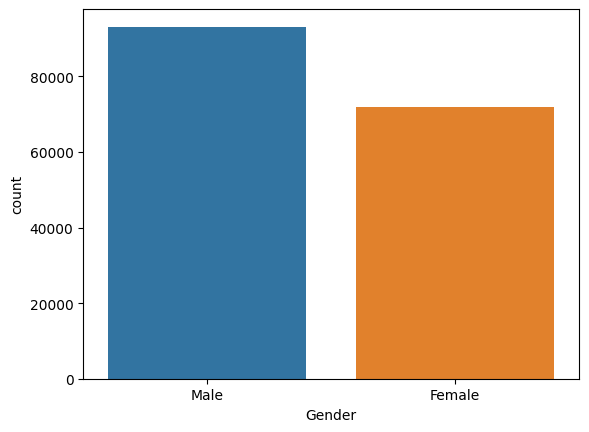

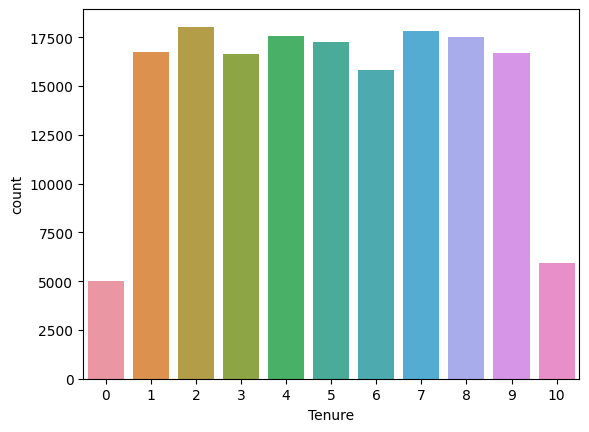

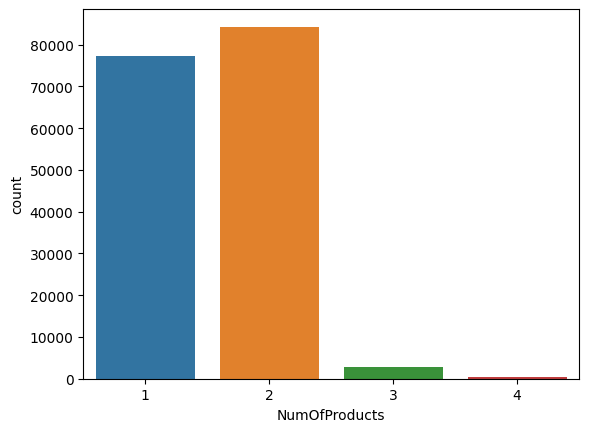

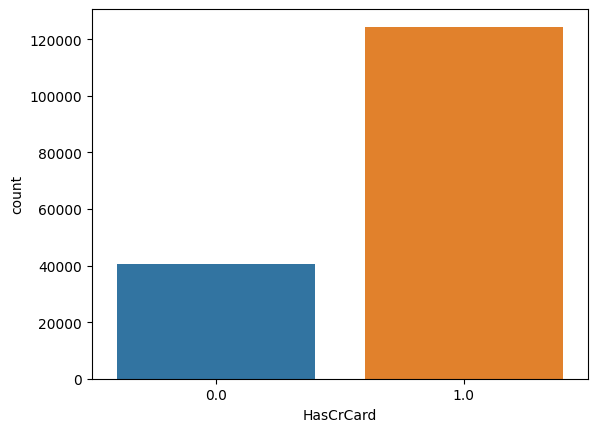

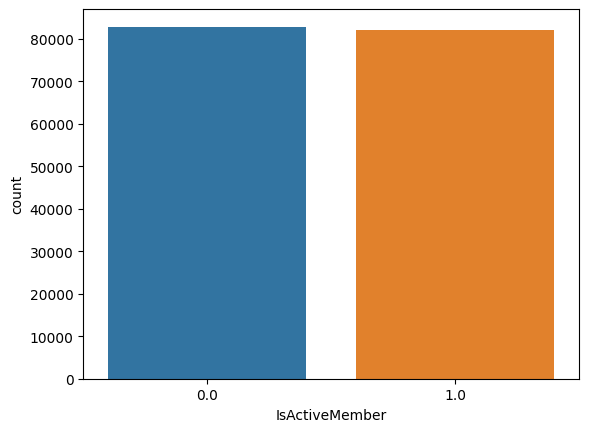

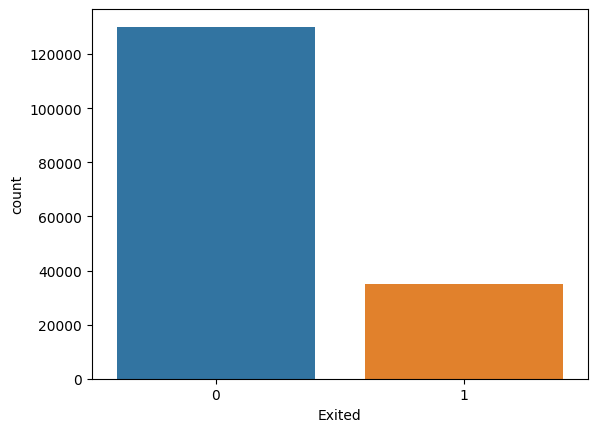

In [11]:
# create a count plot for each cat column
for col in cat_cols:
    sns.countplot(df , x = df[col])
    plt.show()

In [12]:
# print the number of rows and columns
print(f"The train dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The train dataset has 165034 rows and 14 columns


In [13]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### 1.5- Data Prepration

In [14]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
le = LabelEncoder()
# Apply LabelEncoder to 'Geography' column
df['Geography'] = le.fit_transform(df['Geography'])
# Apply LabelEncoder to 'Gender' column
df['Gender'] = le.fit_transform(df['Gender'])

In [15]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [16]:
# split the data into X and y
X = df.drop(['Exited', 'id', 'CustomerId', 'Surname'] , axis=1)
y = df['Exited']

In [17]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83


In [18]:
y.value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [19]:
# train test split the data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [20]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83


In [21]:
y.value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [22]:
# train test split the data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [23]:
from sklearn.preprocessing import MinMaxScaler
# min max scaling to scale the Balancce and EstimatedSalary columns
def scale_columns(df, columns):
 
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    
    for column in columns:
        df[column] = scaler.fit_transform(df[[column]])
    
    return df

df = scale_columns(df, ['Balance', 'EstimatedSalary'])

### 1.6- Model

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have X_train, X_test, y_train, and y_test defined

# Hyperparameter tuning with grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb = XGBClassifier()
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train, y_train)

# Predict the test data
y_pred = best_xgb.predict(X_test)

# Print the updated scores
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred, average='micro'))
print('Recall score:', recall_score(y_test, y_pred, average='micro'))
print('F1 score:', f1_score(y_test, y_pred, average='micro'))

Accuracy score: 0.8677856212318599
Precision score: 0.8677856212318599
Recall score: 0.8677856212318599
F1 score: 0.8677856212318599



### The evaluation summary for bank customer churn analysis based on the provided scores is as follows:

#### Accuracy Score: 86.78%
#### Precision Score: 86.78%
#### Recall Score: 86.78%
#### F1 Score: 86.78%
The scores indicate a relatively balanced performance across different evaluation metrics, suggesting a consistent and accurate model for predicting bank customer churn.